# Fisher Linear Discriminant

In this exercise, you will apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates three data matrices of size (1528, 7), (1307, 7), and (1342, 7) corresponding to the three classes in the dataset: *male (M)*, *female (F)*, and *infant (I)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots various projections of the data: (1) projection on the first dimension of the data, and (2) projection on a random direction.

((1528, 7), (1307, 7), (1342, 7))


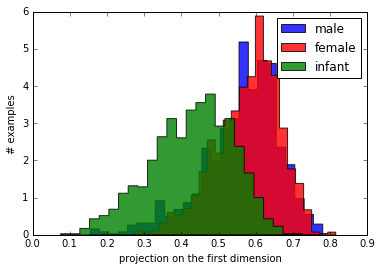

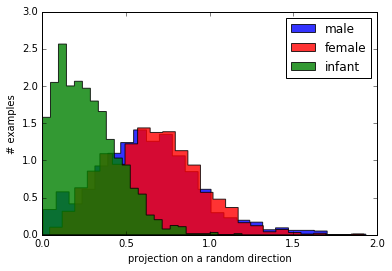

In [2]:
%matplotlib inline
import utils
import numpy as np

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.M.shape,abalone.F.shape, abalone.I.shape)

# Project data on the first dimension
w1 = np.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension')

# Project data on a random direction
w2 = np.random.normal(0,1,[7])
w2 /= (w2**2).sum()**.5
abalone.plot(w2,'projection on a random direction')

## Implementation (30 P)

* **Create a method `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a method `J(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a method `z = phi(x)` that returns a quadratic expansion of a data point `x`. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [30]:
def fisher(X1,X2):
    
    N1 = float(X1.shape[1])
    N2 = float(X2.shape[1])
    
    M1 = X1.mean(1,keepdims=True)
    M2 = X2.mean(1,keepdims=True)
    
    X1_C = X1 - M1
    X2_C = X2 - M2
    
    S1 = np.dot(X1_C,X1_C.T)
    S2 = np.dot(X2_C,X2_C.T)
    
    SW = S1 + S2
    
    SW_inv = np.linalg.inv(SW)
    
    w = np.dot(SW_inv,M1-M2)
    
    b = np.dot(w.T,M2 + M1)/2. + np.log(N1/N2)
    
    #normalize
    w /= (w**2).sum()**.5
    
    return w,b

def J(X1,X2,w):
    M1 = X1.mean(1,keepdims=True)
    M2 = X2.mean(1,keepdims=True)
    
    X1_C = X1 - M1
    X2_C = X2 - M2
    
    S1 = np.dot(X1_C,X1_C.T)
    S2 = np.dot(X2_C,X2_C.T)
    
    SW = S1 + S2
    MM = M1-M2
    SB = np.dot(MM,MM.T)
    
    J_upper = np.dot(np.dot(w.T,SB),w)
    J_lower = np.dot(np.dot(w.T,SW),w)
    
    result = J_upper / J_lower
    
    return result

def phi(x):
    iu = np.triu_indices(x.shape[0])
    xxt = np.dot(x[:,np.newaxis],x[np.newaxis,:])
    return np.concatenate([x,xxt[iu]])


## Analysis (20 P)

* **Print the value of `J(w)` for each discriminated pair of classes (M/F, M/I, F/I), and for several values of `w`:**

  * `w` is a vector that projects the data on the each dimension of the data.
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the difference between the mean vectors of the two classes (after quadratic expansion of the data).
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).


* **For the simple Fisher linear discriminant, plot a histogram of the projected data for each discriminated pair of classes using the function `utils.Abalone.plot()`.**

Classes M/F with w projecting on dim 0: J(w) = 0.000012
Classes M/F with w projecting on dim 1: J(w) = 0.000014
Classes M/F with w projecting on dim 2: J(w) = 0.000011
Classes M/F with w projecting on dim 3: J(w) = 0.000005
Classes M/F with w projecting on dim 4: J(w) = 0.000001
Classes M/F with w projecting on dim 5: J(w) = 0.000008
Classes M/F with w projecting on dim 6: J(w) = 0.000009
Classes M/F with w being the class mean difference: J(w) = 0.000006
Classes M/F with w being the class mean difference of quadratic expanded data: J(w) = 0.000003
Classes M/F with w being the fisher linear discriminant: J(w) = 0.000038
Classes M/F with w being the fisher linear discriminant of quadratic expanded data: J(w) = 0.000051


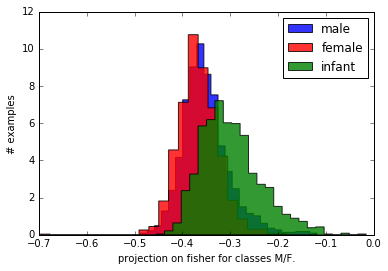

Classes M/I with w projecting on dim 0: J(w) = 0.000558
Classes M/I with w projecting on dim 1: J(w) = 0.000598
Classes M/I with w projecting on dim 2: J(w) = 0.000584
Classes M/I with w projecting on dim 3: J(w) = 0.000700
Classes M/I with w projecting on dim 4: J(w) = 0.000597
Classes M/I with w projecting on dim 5: J(w) = 0.000692
Classes M/I with w projecting on dim 6: J(w) = 0.000660
Classes M/I with w being the class mean difference: J(w) = 0.000697
Classes M/I with w being the class mean difference of quadratic expanded data: J(w) = 0.000543
Classes M/I with w being the fisher linear discriminant: J(w) = 0.000751
Classes M/I with w being the fisher linear discriminant of quadratic expanded data: J(w) = 0.001010


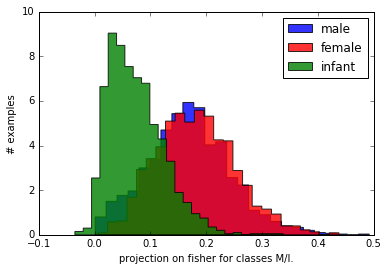

Classes F/I with w projecting on dim 0: J(w) = 0.000895
Classes F/I with w projecting on dim 1: J(w) = 0.000968
Classes F/I with w projecting on dim 2: J(w) = 0.000723
Classes F/I with w projecting on dim 3: J(w) = 0.001076
Classes F/I with w projecting on dim 4: J(w) = 0.000884
Classes F/I with w projecting on dim 5: J(w) = 0.001087
Classes F/I with w projecting on dim 6: J(w) = 0.000998
Classes F/I with w being the class mean difference: J(w) = 0.001076
Classes F/I with w being the class mean difference of quadratic expanded data: J(w) = 0.000833
Classes F/I with w being the fisher linear discriminant: J(w) = 0.001200
Classes F/I with w being the fisher linear discriminant of quadratic expanded data: J(w) = 0.001539


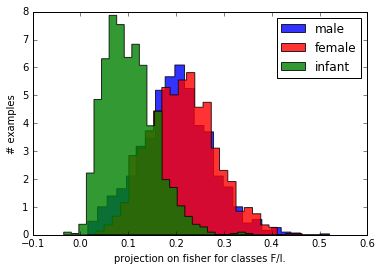

In [31]:
def abalone_analysis():
    abalone = utils.Abalone()
    M,F,I = abalone.M.T,abalone.F.T,abalone.I.T
    class_pairs = [(M,F,"M/F"),(M,I,"M/I"),(F,I,"F/I")]
    
    for X,Y,label in class_pairs:
        
        ### Projection on dims
        units = np.diag(np.ones(M.shape[0]))
        for n,w in enumerate(units):
            Jw = J(X,Y,w)
            print "Classes %s with w projecting on dim %d: J(w) = %f"%(label,n,Jw)
        

        ### rest
        
        qX = np.hstack([phi(x)[:,np.newaxis] for x in X.T])
        qY = np.hstack([phi(y)[:,np.newaxis] for y in Y.T])
        
        #(method,label,quadratic?)
        methods = [
            (X.mean(1,keepdims=True) - Y.mean(1,keepdims=True),"the class mean difference",False),
            (qX.mean(1,keepdims=True) - qY.mean(1,keepdims=True),"the class mean difference of quadratic expanded data",True),
            (fisher(X,Y)[0],"the fisher linear discriminant",False),
            (fisher(qX,qY)[0],"the fisher linear discriminant of quadratic expanded data",True)
        ]
        for w,method,quadratic in methods:
            if quadratic:
                Jw = J(qX,qY,w)
            else:
                Jw = J(X,Y,w)
            print "Classes %s with w being %s: J(w) = %f"%(label,method,Jw)
        
        #plot fisher
        
        w = fisher(X,Y)[0]
        w /= np.sqrt(np.sum(w**2))
        abalone.plot(w,'projection on fisher for classes %s.'%(label))
        
    
abalone_analysis()